Homework 1
==========

## Question 1

*Consider the following cell lineage model: a stem cell population, $x_1$, can differentiate into two progenitor cell populations, $x_2$ and $x_3$, which each differentiate further into a terminal cell population, $x_4$ or $x_5$, respectively.*

*This model is defined by the following set of differential equations:*

$$x'_1 = a_1x_1(1 − x_1 − 0.1x_2 − 0.1x_3) − c_1x_1$$
$$x'_2 = 0.5c_1x_1 − e_1x_2$$
$$x'_3 = e_1x_2 − 0.9x_3$$
$$x'_4 = 0.5c_1x_1 − 0.6x_4$$
$$x'_5 = x_4 − 0.1x_5$$

*where the parameters ($a_1, c_1, e_1$) lie in the range [0, 3].*

*a) Describe the meaning of each term in the first equation (for $x'_1$).*

* $x_1'$: the change in the population size of $x_1$
* $a_1x_1$: the increase in population size of of $x_1$, regulated by some parameter $a_1$
* $(1-x_1-0.1x_2-0.1x_3)$: the inhibition on $x_1$. If this expression were to evaluate to 1 (meaning $-x_1-0.1x_2-0.1x_3 = 0$), that would mean that there is no inhibition on $x_1$ and the population size will change only as a result of differentiation. In reality, the change in population size of $x_1$ is influenced strongly by the current population size of $x_1$ as well as more weakly by the population sizes of $x_2$ and $x_3$.
* $-c_1x_1$: the decrease in population size of $x_1$ as a result of differentiation into $x_2$ and $x_4$, based on some parameter $c_1$

*b) Create a model of this system in Julia, given input parameters ($a_1, c_1, e_1$) and initial conditions. Demonstrate that the model can take different input parameter values.*

In [1]:
using Catalyst
using OrdinaryDiffEq

In [2]:
stemCellModel = @reaction_network begin
    a₁ * (1 - x₁ - 0.1x₂ - 0.1x₃), x₁ --> 2x₁
    0.5c₁, x₁ --> x₂
    e₁, x₂ --> x₃
    0.9, x₃ --> ∅
    0.5c₁, x₁ --> x₄
    1.0, x₄ --> x₅
    -0.4, x₄ --> ∅
    0.1, x₅ --> ∅
end

convert(ODESystem, stemCellModel)

Model ##ReactionSystem#231 with 5 equations
Unknowns (5):
  x₁(t)
  x₂(t)
  x₃(t)
  x₄(t)
⋮
Parameters (3):
  a₁
  c₁
  e₁

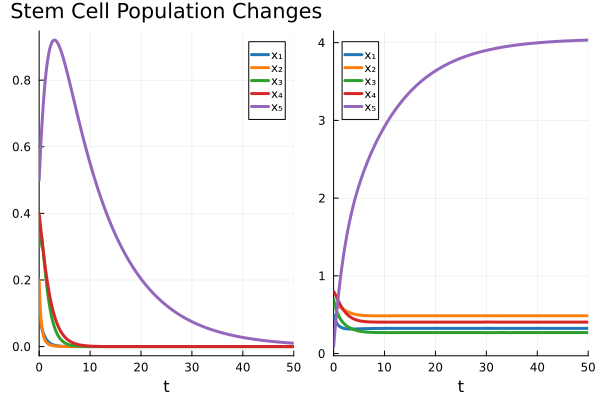

In [4]:
using Plots

initConditionsA = [:x₁ => 0.1, :x₂ => 0.2, :x₃ => 0.3, :x₄ => 0.4, :x₅ => 0.5]
paramsA = [:a₁ => 1.0, :c₁ => 2.0, :e₁ => 3.0]
initConditionsB = [:x₁ => 0.5, :x₂ => 0.6, :x₃ => 0.7, :x₄ => 0.8, :x₅ => 0.09]
paramsB = [:a₁ => 2.5, :c₁ => 1.5, :e₁ => 0.5]
timeSpan = (0.0, 50.0)

odeA = ODEProblem(stemCellModel, initConditionsA, timeSpan, paramsA)
odeB = ODEProblem(stemCellModel, initConditionsB, timeSpan, paramsB)
solA = solve(odeA, Tsit5())
solB = solve(odeB, Tsit5())

plots = []
push!(plots, plot(solA, palette=:tab10, title="Stem Cell Population Changes"))
push!(plots, plot(solB, palette=:tab10))
plot!(plots..., linewidth=3)

*c) Simulate the model using DifferentialEquations.jl for numerically integration, Simulate this model in the time range $t \in [0, 50]$ for $a_1 = 0.9, c_1 = 0.1, e_1 = 0.5$ and initial conditions $x_1(t_0) = 0.4, x_2(t_0) = x_3(t_0) = 0.2, x_4(t_0) = x_5(t_0) = 0$. Which species dominate as the system reaches steady state?*

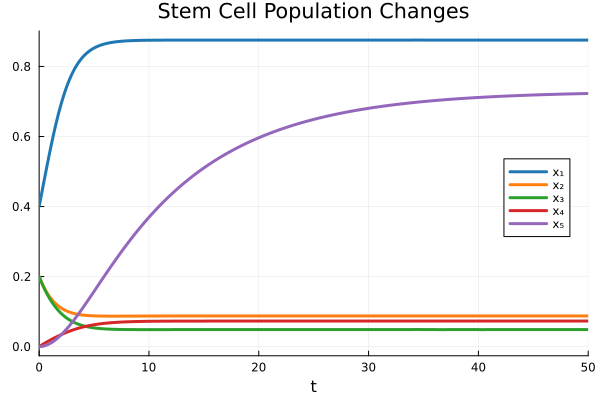

In [79]:
initConditions = [:x₁ => 0.4, :x₂ => 0.2, :x₃ => 0.2, :x₄ => 0.0, :x₅ => 0.0]
params = [:a₁ => 0.9, :c₁ => 0.1, :e₁ => 0.5]
timeSpan = (0.0, 50.0)
ode = ODEProblem(stemCellModel, initConditions, timeSpan, params)
sol = solve(ode, Tsit5())
plot(sol, palette=:tab10, linewidth=3, title="Stem Cell Population Changes", legend=:right)

We see that species $x₁$ and $x₅$ dominate. Since $a₁$ is relatively high (0.9), there's a high rate of regeneration for $x_1$, and $c_1$, which impacts the differentiation rate of $x_1$ is low (0.1), meaning only 10% of $x_1$ is converted to $x_2$ and $x_4$ at each time step.
$x_5$ is high since much of $x_4$ is converted to $x_5$, but very little (10%) of $x_5$ decays. In contrast, only 50% of $x_2$ is converted to $x_3$ and 90% of $x_3$ decays at each time step, so we see small very small population sizes for $x_2$ and $x_3$ after just a few time steps.

## Question 2
*Can this system be solved at steady state analytically, i.e. in terms of the parameters $a_1, c_1, e_1$? Why? Solve this system using symbolic computation in Julia. How many ﬁxed points does the model permit? What constraints on the parameters are required to ensure that x1 will reach a positive value at steady state?*

Yes, this system can be solved analytically (i.e. the parameters can be solved individually, not in terms of each other). We can see that using $x'_3 = e_1x_2 − 0.9x_3$, we can solve for $e_1$ without using any other parameters; similarly, $x'_4 = 0.5c_1x_1 − 0.6x_4$ can be used to solve for $c_1$. To solve for $a_1$, we can use $x'_1 = a_1x_1(1 − x_1 − 0.1x_2 − 0.1x_3) − c_1x_1$ and substitute in the solution for $c_1$. Thus, all the parameters can be solved for analytically.

In [8]:
using SymPy

a₁, c₁, e₁ = SymPy.@syms a₁ c₁ e₁
x₁, x₂, x₃, x₄, x₅ = SymPy.@syms x₁ x₂ x₃ x₄ x₅

rhs = [a₁ * x₁ * (1 - x₁ - 0.1x₂ - 0.1x₃) - c₁ * x₁,
    0.5 * c₁ * x₁ - e₁ * x₂,
    e₁ * x₂ - 0.9 * x₃,
    0.5 * c₁ * x₁ - 0.6 * x₄,
    x₄ - 0.1 * x₅]

fps = SymPy.solve(rhs, [x₁, x₂, x₃, x₄, x₅])

J = rhs.jacobian([x₁, x₂, x₃, x₄, x₅]);
J

5×5 Matrix{SymPyCore.Sym{PyCall.PyObject}}:
 -a₁*x₁ + a₁*(-x₁ - 0.1*x₂ - 0.1*x₃ + 1) - c₁  …                   0
                                       0.5*c₁                      0
                                            0                      0
                                       0.5*c₁                      0
                                            0     -0.100000000000000

In [9]:
# substitute fixed point values
nfp_1 = 1
J_fp_1 = J.subs([(x₁, fps[nfp_1][1]), (x₂, fps[nfp_1][2]), (x₃, fps[nfp_1][3]), (x₄, fps[nfp_1][4]), (x₅, fps[nfp_1][5])])

J_fp_solved_1 = J_fp_1.subs([(a₁, 0.9), (e₁, 0.5), (c₁, 0.1)])

# calculate eigenvalues
eigs_1 = J_fp_solved_1.eigenvals()

# find stability of fixed point
is_stable = false
if maximum(real(collect(keys(eigs_1)))) < 0
    is_stable = true
end
is_stable

false

In [10]:
# substitute fixed point values
nfp_2 = 2
J_fp_2 = J.subs([(x₁, fps[nfp_2][1]), (x₂, fps[nfp_2][2]), (x₃, fps[nfp_2][3]), (x₄, fps[nfp_2][4]), (x₅, fps[nfp_2][5])])

J_fp_solved_2 = J_fp_2.subs([(a₁, 0.9), (e₁, 0.5), (c₁, 0.1)])

# calculate eigenvalues
eigs_2 = J_fp_solved_2.eigenvals()

# find stability of fixed point
is_stable = false
if maximum(real(collect(keys(eigs_2)))) < 0
    is_stable = true
end
is_stable

true

In [11]:
using Latexify
latexify(fps)

"\\begin{equation}\n\\left[\n\\begin{array}{c}\n\\left[\n\\begin{array}{c}\n0.0 \\\\\n0.0 \\\\\n0.0 \\\\\n0.0 \\\\\n0.0 \\\\\n\\end{array}\n\\right] \\\\\n\\left[\n\\begin{array}{c}\n\\frac{180.0 \\cdot e_1 \\cdot \\left( a_1 - c_1 \\right)}{a_1 \\cdot \\left( 10.0 \\cdot c_1 \\cdot e_1 + 9.0 \\cdot c_1 + 180.0 \\cdo" ⋯ 404 bytes ⋯ "_1 \\cdot e_1 + 9.0 \\cdot c_1 + 180.0 \\cdot e_1 \\right)} \\\\\n\\frac{1500.0 \\cdot c_1 \\cdot e_1 \\cdot \\left( a_1 - c_1 \\right)}{a_1 \\cdot \\left( 10.0 \\cdot c_1 \\cdot e_1 + 9.0 \\cdot c_1 + 180.0 \\cdot e_1 \\right)} \\\\\n\\end{array}\n\\right] \\\\\n\\end{array}\n\\right]\n\\end{equation}\n"

There are 2 fixed points for this model. The trivial fixed point is not stable, while the non-trivial fixed point is stable.

To ensure that $x_1$ is positive at steady state, we look at the value of $x_1$ at the stable fixed point. This value is $\frac{180e_1(a_1−c_1)}{a_1(10c_1e_1+9c_1+180e_1)}$. So long as $a_1 > c_1$ and $a_1, c_1 > 0$, in addition to the given constraints that $a_1, c_1, e_1 \in [0, 3]$ this value will be positive (and non-zero).

## Question 3
*The question of whether more than one steady state can be reached for a given set of parameter values (multistability) can be investigated numerically by performing a sweep through a range of initial conditions. Write a script to simulate the model for diﬀerent sets of **initial conditions** (at least 100) in the range $x_i \in [0, 1]$ and analyze the results. Plot the results (you may need to think carefully about the best way to visualize them). Do you ﬁnd evidence for multistability? Describe approximately the critical initial condition thresholds, if they exist. Discuss brieﬂy what strategies could be used to investigate whether this model permits multistability.*

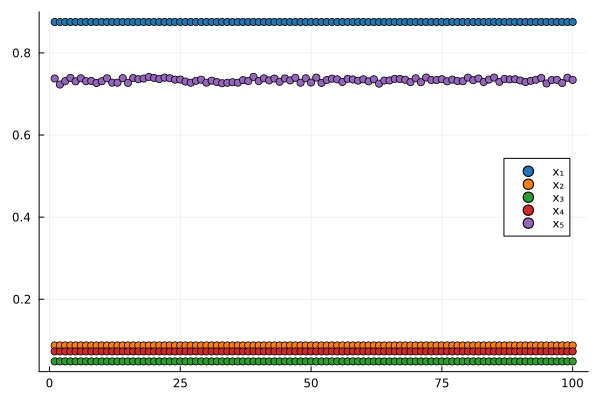

In [12]:
randInitConditions = rand(Float64, (100, 5))

params = [:a₁ => 0.9, :c₁ => 0.1, :e₁ => 0.5]
timeSpan = (0.0, 50.0)
populations = [:x₁, :x₂, :x₃, :x₄, :x₅]

endVals = [[], [], [], [], []]

for i = 1:100
    conditions = Dict(populations .=> randInitConditions[i, :])
    ode = ODEProblem(stemCellModel, conditions, timeSpan, params)
    sol = solve(ode, Tsit5())

    for j in 1:5
        push!(endVals[j], sol[end][j])
    end
end

scatter(legend=:right, palette=:tab10)
for j in 1:5
    scatter!(endVals[j], label=String(populations[j]))
end
scatter!()


There does not appear to be any evidence for multistability when  $x_1 > 0$. Given 100 different random initial conditions for the cell populations, they all converge to nearly the same end values. This suggests that these end values are the only stable values for this system under the given parameters. If there were multistability, we would expect to see instances where the ending population sizes are at different levels than from other trials; however, in every single instance, the ending population sizes are about the same. Each population has a small level of variation (with $x_5$'s variation being the greatest and most visible given the plot's scale), but in overall the populations all converge upon a single steady state.

For critical conditions, we require that $x_1$ not be zero. If $x_1$ is 0, there may be small changes to the populations of $x_1$, $x_2$, $x_3$, and $x_4$, but in the end all populations converge to 0. This is trivially stable, but if we only care about the end state of convergence where there are still some cell populations, we would require that $x_1 \neq 0$. 

We only investigate differences in initial conditions. It would be interesting to look into how different parameters affect stability. Bifurcation analysis would allow us to see whether the parameters $a_1, c_1, e_1$ could impact steady states and allow for multistability.

## Question 4
*Choose a feedback motif that was presented in the Network Motifs paper discussed in class (Alon, 2007). Give a biological system that represents an example of this type of feedback motif. Explain the role of each of the variables/species in the system. Write down a model of this system described by differential equations. Explain your reasoning for the form of each equation. Choose a set of initial conditions and parameter and simulate this model numerically in Julia. Discuss its behavior for different choices of **parameters**. What type of transient and equilibria behaviors does this model display? Could it permit oscillations? Could it permit multistability? Shows plots to explain your reasoning. You are expected to write a short report (2-3 paragraphs) to discuss your investigations and the conclusions you draw.*



I chose the coherent type-1 feedforward loop (C1-FFL) with a SUM gate. While an OR gate requires either input to be present, a SUM gate works by summing over the two inputs, meaning that the effect will be stronger if both inputs are present than if just one were present. A biological system that exhibits this motif is the flagella class 2 operon regulation network (Kalir, Mangan, and Alon, *A coherent feed-forward loop with a SUM input function prolongs flagella expression in Escherichia coli*, 2005).

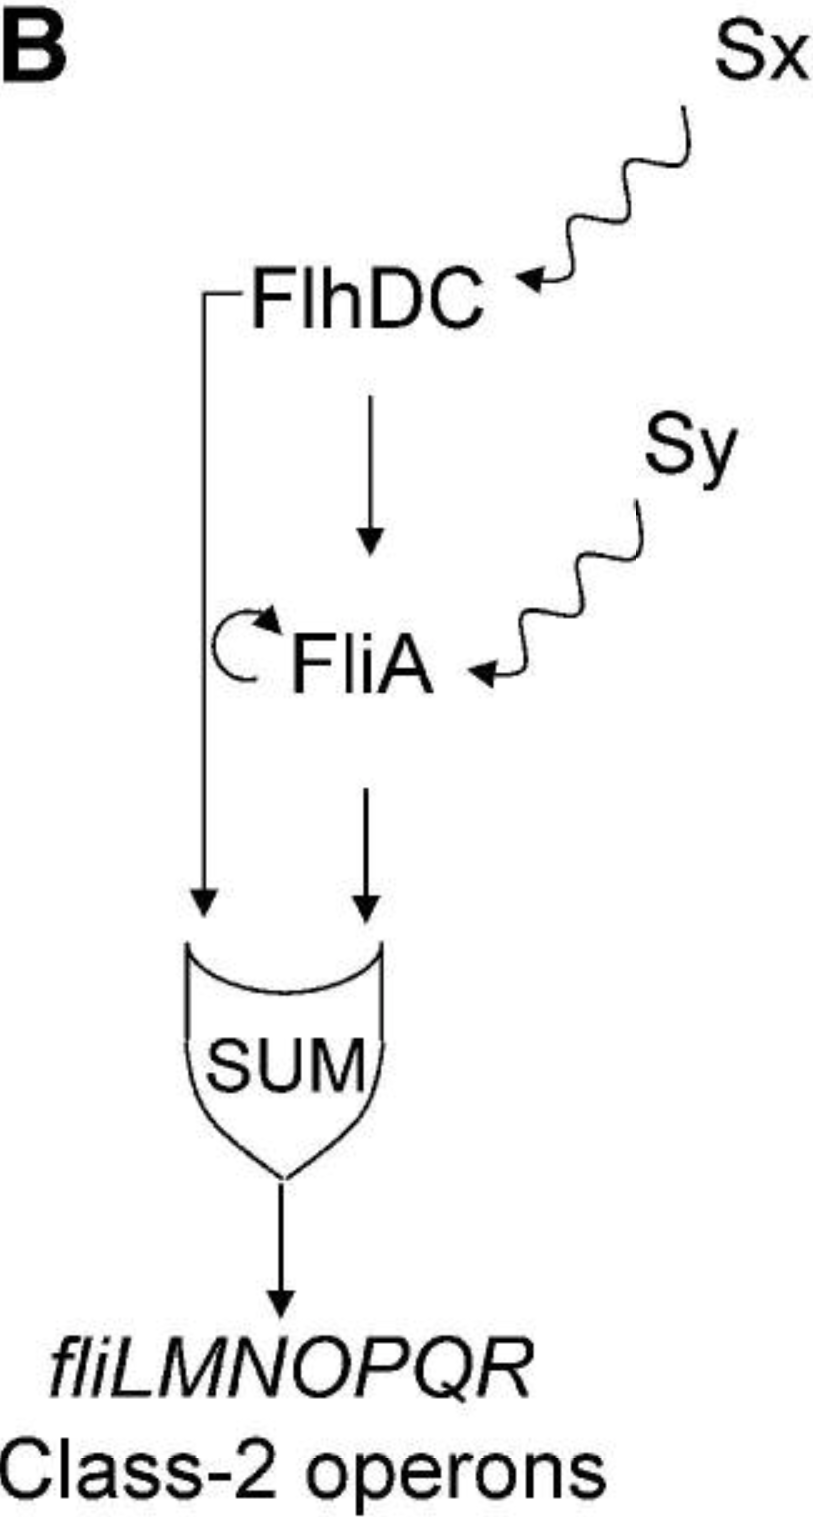

To construct the model, I used the equations described in Glass, Jin, and Riedel-Kruse, *Nonlinear delay differential equations and their application to modeling biological network motifs*, 2021. As discussed in class (and the posted notes), we describe the rates using $$\frac{rx^n}{\gamma^n + x^n} - \beta y$$ for activation and $$\frac{r\gamma^n}{\gamma^n + x^n} - \beta y$$ for inhibition. The authors incorporate a degradation term $\beta$ to account for all forms of species population reduction.

I describe these parameters as follows:
* $r$: production rate -- maximum rate at which the species is activated in response to signal input
* $n$: hill coefficient -- how cooperative signals are when activating a species
* $\beta$: degradation rate -- maximum rate at which the species is removed from the system
* $\gamma$: sensitivity -- how much signal is needed to activate a species

I used these to construct the Catalyst reaction network, from which I extracted the differential equations. Rather than using the lengthy names, we abbreviate FlhDC to x, FliA to y, and fliLMNOPQR to z.
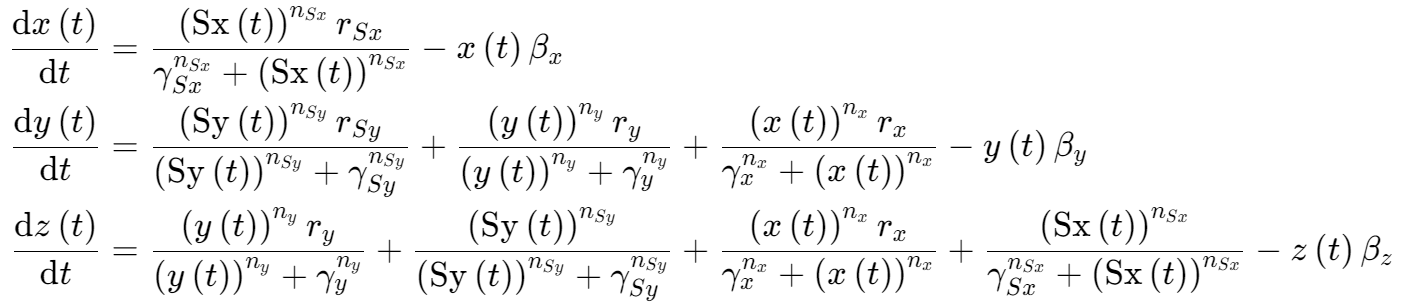

Though kind of a mess to look at, each term does exactly as you would expect. Firstly, FlhDC follows exactly the Hill equation for activation by Sx, and is degraded at a rate proportional to its concentration.

For FliA, we have activation by Sy, FlhDC, and itself. This results in 3 Hill equation terms, as well as the degradation term.

For fliLMNOPQR, we determine the rate by summing the activational effects of FliA and FlhDC. We can see that we do just sum up all the rates for the upstream species, and include a degradation term.

In [39]:
using Catalyst
using DifferentialEquations
using Plots

# Define species and reactions
@parameters t
@variables x(t) y(t) z(t) Sx(t) Sy(t)
@parameters γ_Sx n_Sx r_Sx γ_Sy n_Sy r_Sy γ_y n_y r_y γ_x n_x r_x β_x β_y β_z

flagella_model = @reaction_network begin
    # Sx and Sy constitutively expressed
    (0, 0), ∅ <--> Sx
    (0, 0), ∅ <--> Sy

    # Sx --> x activation
    (r_Sx * Sx^n_Sx) / (γ_Sx^n_Sx + Sx^n_Sx), ∅ --> x

    # x --> y activation
    (r_x * x^n_x) / (γ_x^n_x + x^n_x), ∅ --> y

    # Sy --> y activation
    (r_Sy * Sy^n_Sy) / (γ_Sy^n_Sy + Sy^n_Sy), ∅ --> y

    # y --> y activation
    (r_y * y^n_y) / (γ_y^n_y + y^n_y), ∅ --> y

    # x SUM y activates z
    (((Sy^n_Sy) / (γ_Sy^n_Sy + Sy^n_Sy)) + ((r_x * x^n_x) / (γ_x^n_x + x^n_x))) +
    ((r_y * y^n_y) / (γ_y^n_y + y^n_y)) +
    ((Sx^n_Sx) / (γ_Sx^n_Sx + Sx^n_Sx)), ∅ --> z

    # degradation of species
    β_x, x --> ∅
    β_y, y --> ∅
    β_z, z --> ∅
end
convert(ODESystem, flagella_model)

Model ##ReactionSystem#276 with 5 equations
Unknowns (5):
  Sx(t)
  Sy(t)
  x(t)
  y(t)
⋮
Parameters (15):
  r_Sx
  n_Sx
  γ_Sx
  r_x
⋮

For my initial simulation, I let Sy be constitutively expressed, then had jumps in Sx, similar to the Alon, 2009, paper we read for class. I let the initial conditions for FlhDC, FliA, and fliLMNOPQR be 0.0. For the $n$ values, I read in Glass, Jin, and Riedel-Kruse that 2.0 is pretty typical for biological cooperation; similarly, a $\gamma$ value of 1.0 is standard for sensitivity. For $r$ and $\beta$ parameters, I didn't find any immediate guidelines, so I set them to 1.0 to start out.

We see that fliLMNOPQR is exactly equal to the sum of FlhDC and FliA. fliLMNOPQR is equal to FliA when FlhDC is 0, as expected. Note that  As described in Kalir, Mangan, and Alon, we would expect a delay in the decreased of fliLMNOPQR after Sx is turned off due to the sum gate; this is the result we see -- there's a slow tapering off of FlhDC and FliA, which results in a delayed decreased in fliLMNOPQR. So with its simplest parameters, this model does seem at least mildly accurate.

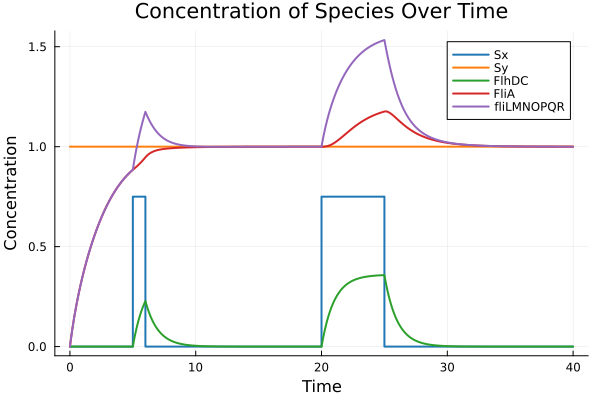

In [52]:
# conditions for the callbacks
ϵ = 1e-3
condition_high1(u, t, integrator) = abs(t - 5.0) < ϵ
condition_low1(u, t, integrator) = abs(t - 6.0) < ϵ
condition_high2(u, t, integrator) = abs(t - 20.0) < ϵ
condition_low2(u, t, integrator) = abs(t - 25.0) < ϵ

# affect functions to spike Sx values
function affect_high!(integrator)
    integrator.u[1] = 0.75
end
function affect_low!(integrator)
    integrator.u[1] = 0.0
end

# callbacks to call the affect when a condition is met
cb_high1 = DiscreteCallback(condition_high1, affect_high!)
cb_low1 = DiscreteCallback(condition_low1, affect_low!)
cb_high2 = DiscreteCallback(condition_high2, affect_high!)
cb_low2 = DiscreteCallback(condition_low2, affect_low!)

# combine callbacks
callback = CallbackSet(cb_high1, cb_low1, cb_high2, cb_low2)

# init conditions and params
u0 = [Sx => 0.0, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]

params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]

# solver steps around jump times
tspan = (0.0, 40.0)
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5(), callback=callback, tstops=collect(0:0.01:40))

# plot results
plot(sol.t, hcat(sol.u...)', xlabel="Time", ylabel="Concentration", legend=:topright,
    labels=["Sx" "Sy" "FlhDC" "FliA" "fliLMNOPQR"], lw=2, title="Concentration of Species Over Time", palette=:tab10)


I then bump Sx to 0.9 and use these same values as a baseline. I then increase each type of parameter to better understand how each parameter affects the system and stability.

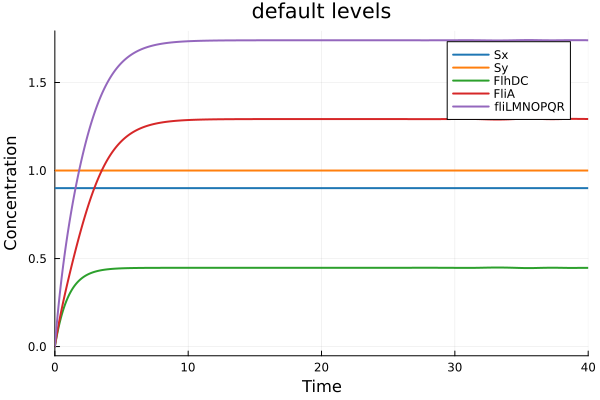

In [61]:
# making multiple plots with different initial conditions and parameters
plots = []
tspan = (0.0, 40.0)

# init conditions and params
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", legend=:topright, labels=["Sx" "Sy" "FlhDC" "FliA" "fliLMNOPQR"], lw=2, palette=:tab10, title="default levels"))

plot(plots..., linewidth=3)

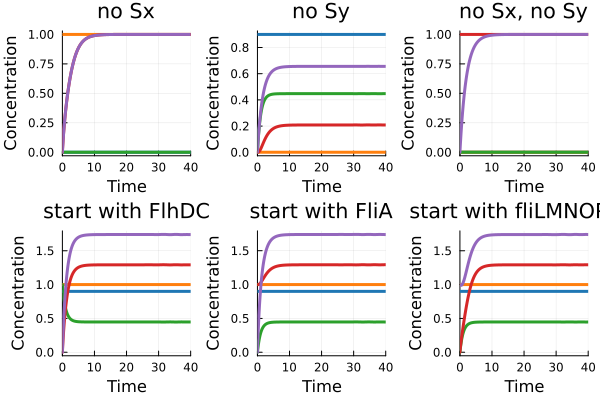

In [76]:
plots = []

# no Sx
u0 = [Sx => 0.0, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="no Sx"))

# no Sy
u0 = [Sx => 0.9, Sy => 0.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="no Sy"))

# no Sx, no Sy, initial y 
u0 = [Sx => 0.0, Sy => 0.0, x => 0.0, y => 1.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 0.5, β_z => 0.5]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="no Sx, no Sy"))

# high initial x
u0 = [Sx => 0.9, Sy => 1.0, x => 1.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="start with FlhDC"))

# high initial y
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 1.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="start with FliA"))

# high initial z
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 1.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="start with fliLMNOPQR"))

plot!(plots..., linewidth=3)

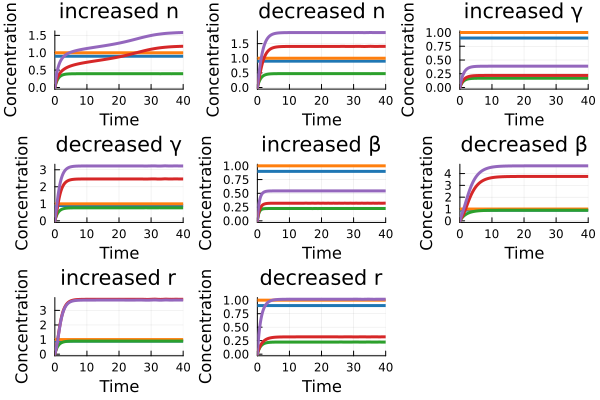

In [64]:
plots = []

# increase n
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 4.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 4.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 4.0, r_x => 1.0,
    γ_y => 1.0, n_y => 4.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="increased n"))

# decrease n
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 1.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 1.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 1.0, r_x => 1.0,
    γ_y => 1.0, n_y => 1.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="decreased n"))

# increase γ
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 2.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 2.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 2.0, n_x => 2.0, r_x => 1.0,
    γ_y => 2.0, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="increased γ"))

# decrease γ
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 0.5, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 0.5, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 0.5, n_x => 2.0, r_x => 1.0,
    γ_y => 0.5, n_y => 2.0, r_y => 1.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="decreased γ"))

# increased β
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 2.0, β_y => 2.0, β_z => 2.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="increased β"))

# decreased β
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 1.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 1.0,
    γ_x => 1.0, n_x => 2.0, r_x => 1.0,
    γ_y => 1.0, n_y => 2.0, r_y => 1.0,
    β_x => 0.5, β_y => 0.5, β_z => 0.5]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="decreased β"))

# increased r
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 2.0,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 2.0,
    γ_x => 1.0, n_x => 2.0, r_x => 2.0,
    γ_y => 1.0, n_y => 2.0, r_y => 2.0,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="increased r"))

# decreased r
u0 = [Sx => 0.9, Sy => 1.0, x => 0.0, y => 0.0, z => 0.0]
params = [
    γ_Sx => 1.0, n_Sx => 2.0, r_Sx => 0.5,
    γ_Sy => 1.0, n_Sy => 2.0, r_Sy => 0.5,
    γ_x => 1.0, n_x => 2.0, r_x => 0.5,
    γ_y => 1.0, n_y => 2.0, r_y => 0.5,
    β_x => 1.0, β_y => 1.0, β_z => 1.0]
prob = ODEProblem(flagella_model, u0, tspan, params)
sol = solve(prob, Tsit5())
push!(plots, plot(sol, xlabel="Time", ylabel="Concentration", lw=2, palette=:tab10, legend=false, title="decreased r"))

plot!(plots..., linewidth=3)


We can see that changing the initial values for each species has no effect on the end stability, but changing the amount of Sx and Sy can have very substantial results. 
If there's zero Sx, we don't have activation of FlhDC, but since we still have Sy, we have activation of FliA and fliLMNOPQR. If there's no Sy but we have Sx, we still have activation of all species, so we reach equalibrium. For the "no Sx, no Sy" case, I decreased the degradation rate of FliA and fliLMNOPQR to demonstrate that FliA has self-activation, meaning we reach equilibrium at high FliA and fliLMNOPQR levels.

When changing the other species, we don't see much of an effect on the end stability state if the Sx and Sy levels are constant.

When changing the parameters, we do see some potential bifurcation events. We don't see much of an effect when $n$ is decreased, but we see an interesting trend when $n$ is increased: there's a cooperative interaction on FliA, which in turn increases the activation of fliLMNOPQR. As mentioned before, $\gamma$ is the sensitivity; lower $gamma$ levels mean less species is activated, while higher $gamma$ levels super increase the amount of species that gets activated. Increasing the degradation rate $\beta$ results in lower end levels of each species since greater amounts of the species are removed at each time step; decreased $\beta$ means that more species stays in the system. Lastly, increasing $r$ means that the population is activated more quickly, so we see higher levels of activation when $r$ is greater.

For multistability, we can see that the system does allow for different end stable points when Sx and Sy levels are changed, but not when the other species are changed.

Oscillations typically occur as a result of direct or indirect activation/inhibition interactions among species. Since this system doesn't have any inhibition, we would not expect to see oscillations.